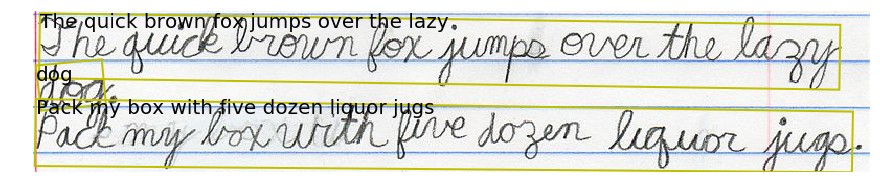

In [4]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "9438c593902948179871edf1cf0033c6"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

text_recognition_url = vision_base_url + "recognizeText"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/" + \
    "Cursive_Writing_on_Notebook_paper.jpg/800px-Cursive_Writing_on_Notebook_paper.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
# Note: The request parameter changed for APIv2.
# For APIv1, it is 'handwriting': 'true'.
params  = {'mode': 'Handwritten'}
data    = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

# Extracting handwritten text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    time.sleep(1)
    if ("recognitionResult" in analysis):
        poll= False 
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll= False

polygons=[]
if ("recognitionResult" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
        for line in analysis["recognitionResult"]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
        for i in range(0, len(polygon[0]), 2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")

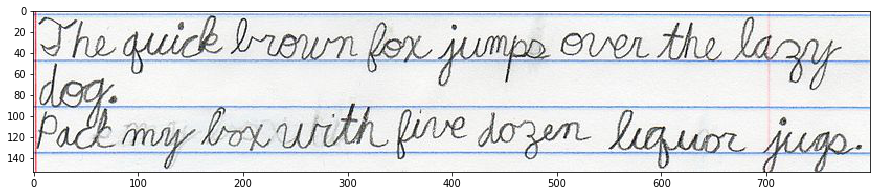

In [6]:
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)

In [12]:
response_final.json()

{'status': 'Succeeded',
 'recognitionResult': {'lines': [{'boundingBox': [2,
     52,
     65,
     46,
     69,
     89,
     7,
     95],
    'text': 'dog',
    'words': [{'boundingBox': [0, 58, 62, 41, 76, 84, 2, 101],
      'text': 'dog'}]},
   {'boundingBox': [6, 2, 771, 13, 770, 75, 5, 64],
    'text': 'The quick brown fox jumps over the lazy',
    'words': [{'boundingBox': [0, 3, 91, 4, 76, 70, 0, 70], 'text': 'The'},
     {'boundingBox': [73, 3, 187, 4, 173, 71, 58, 70], 'text': 'quick'},
     {'boundingBox': [174, 4, 319, 5, 305, 72, 159, 71], 'text': 'brown'},
     {'boundingBox': [306, 5, 385, 5, 371, 72, 291, 72], 'text': 'fox'},
     {'boundingBox': [381, 5, 504, 6, 489, 73, 366, 72], 'text': 'jumps'},
     {'boundingBox': [491, 6, 605, 7, 591, 74, 476, 73], 'text': 'over'},
     {'boundingBox': [588, 7, 671, 7, 657, 74, 573, 74], 'text': 'the'},
     {'boundingBox': [658, 7, 781, 8, 767, 75, 643, 74], 'text': 'lazy'}]},
   {'boundingBox': [2, 84, 783, 96, 782, 154, 1, 148